In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime 
import requests 


In [2]:
url = 'https://api.nasa.gov/neo/rest/v1/neo/browse?page=1&api_key=rsTSh621hbpy9PYSGpOdfvQIsobKdfja2EtMB2HW'
response = requests.get(url)
data = response.json()

In [3]:
data.keys()

dict_keys(['links', 'page', 'near_earth_objects'])

In [4]:
data['page']

{'size': 20, 'total_elements': 25983, 'total_pages': 1300, 'number': 1}

# Data Frame Simples

In [7]:
int_cols = ['id', 'name', 'absolute_magnitude_h', 'is_potentially_hazardous_asteroid']

In [8]:
simp_df = pd.json_normalize(data['near_earth_objects'])
simp_df = simp_df.loc[:, int_cols]
simp_df.head()

,id,name,absolute_magnitude_h,is_potentially_hazardous_asteroid
0,2001981,1981 Midas (1973 EA),15.22,True
1,2002059,2059 Baboquivari (1963 UA),15.97,False
2,2002061,2061 Anza (1960 UA),16.34,False
3,2002062,2062 Aten (1976 AA),17.10,False
4,2002063,2063 Bacchus (1977 HB),17.25,False


In [10]:
simp_df.describe(include='all')

,id,name,absolute_magnitude_h,is_potentially_hazardous_asteroid
count,20,20,20.000000,20
unique,20,20,NaN,2
top,2002062,2101 Adonis (1936 CA),NaN,False
freq,1,1,NaN,13
mean,NaN,NaN,16.195500,NaN
std,NaN,NaN,1.649809,NaN
min,NaN,NaN,13.330000,NaN
25%,NaN,NaN,15.165000,NaN
50%,NaN,NaN,16.080000,NaN
75%,NaN,NaN,17.145000,NaN


# Data Frame estendido

In [11]:
int_cols = ['id', 'name', 'is_potentially_hazardous_asteroid', 'absolute_magnitude_h']

In [14]:
loc_cols = ['id', 'name', 'close_approach_date', 'absolute_magnitude_h', 'miss_distance.lunar', 'is_potentially_hazardous_asteroid']

In [15]:
ext_df = pd.json_normalize(data['near_earth_objects'], 'close_approach_data', int_cols)
ext_df = ext_df.loc[:, loc_cols]
ext_df.head()

,id,name,close_approach_date,absolute_magnitude_h,miss_distance.lunar,is_potentially_hazardous_asteroid
0,2001981,1981 Midas (1973 EA),1902-04-04,15.22,145.881062176,True
1,2001981,1981 Midas (1973 EA),1909-09-01,15.22,175.6949010048,True
2,2001981,1981 Midas (1973 EA),1916-09-24,15.22,60.327178858,True
3,2001981,1981 Midas (1973 EA),1921-03-15,15.22,23.4053786854,True
4,2001981,1981 Midas (1973 EA),1935-09-06,15.22,125.9538932643,True


In [16]:
ext_df.describe(include='all')

,id,name,close_approach_date,absolute_magnitude_h,miss_distance.lunar,is_potentially_hazardous_asteroid
count,1282,1282,1282,1282.0,1282,1282
unique,20,20,1272,20.0,1282,2
top,2002340,2340 Hathor (1976 UA),1919-06-20,20.2,96.0667243178,False
freq,208,208,2,208.0,1,772


In [19]:
ext_df = ext_df.astype({"absolute_magnitude_h": float, "miss_distance.lunar": float})
ext_df.head()

,id,name,close_approach_date,absolute_magnitude_h,miss_distance.lunar,is_potentially_hazardous_asteroid
0,2001981,1981 Midas (1973 EA),1902-04-04,15.22,145.881062,True
1,2001981,1981 Midas (1973 EA),1909-09-01,15.22,175.694901,True
2,2001981,1981 Midas (1973 EA),1916-09-24,15.22,60.327179,True
3,2001981,1981 Midas (1973 EA),1921-03-15,15.22,23.405379,True
4,2001981,1981 Midas (1973 EA),1935-09-06,15.22,125.953893,True


In [18]:
ext_df.describe(include='all')

,id,name,close_approach_date,absolute_magnitude_h,miss_distance.lunar,is_potentially_hazardous_asteroid
count,1282,1282,1282,1282.000000,1282.000000,1282
unique,20,20,1272,NaN,NaN,2
top,2002340,2340 Hathor (1976 UA),1919-06-20,NaN,NaN,False
freq,208,208,2,NaN,NaN,772
mean,NaN,NaN,NaN,16.879672,119.533461,NaN
std,NaN,NaN,NaN,1.906227,114.387994,NaN
min,NaN,NaN,NaN,13.330000,1.929798,NaN
25%,NaN,NaN,NaN,15.250000,52.078406,NaN
50%,NaN,NaN,NaN,17.100000,98.762644,NaN
75%,NaN,NaN,NaN,17.480000,154.820356,NaN


# Número de objetos perigosos à Terra

In [21]:
np.where(simp_df['is_potentially_hazardous_asteroid']==True)

(array([ 0,  6,  7,  8,  9, 13, 18]),)

In [22]:
dangerous_obj = simp_df.loc[simp_df['is_potentially_hazardous_asteroid']==True]
dangerous_obj

,id,name,absolute_magnitude_h,is_potentially_hazardous_asteroid
0,2001981,1981 Midas (1973 EA),15.22,True
6,2002101,2101 Adonis (1936 CA),18.64,True
7,2002102,2102 Tantalus (1975 YA),16.01,True
8,2002135,2135 Aristaeus (1977 HA),18.02,True
9,2002201,2201 Oljato (1947 XC),15.25,True
13,2002340,2340 Hathor (1976 UA),20.20,True
18,2003122,3122 Florence (1981 ET3),14.03,True


In [23]:
len(dangerous_obj)

7

# Média e desvio padrão da distância dos objetos perigosos

In [25]:
dangerous_obj_id = dangerous_obj['id'].values
dangerous_obj_id

array(['2001981', '2002101', '2002102', '2002135', '2002201', '2002340',
       '2003122'], dtype=object)

In [26]:
mean_all = ext_df.groupby('id', as_index=False).mean().drop('absolute_magnitude_h', axis=1)

In [28]:
dangerous_obj_mean = mean_all.loc[mean_all['id'].isin(dangerous_obj_id)] #isin é para mostrar onde contém aquele valor.
dangerous_obj_mean = dangerous_obj_mean.rename(columns={'miss_distance.lunar': 'mean'})
dangerous_obj_mean

,id,mean
0,2001981,96.562637
6,2002101,84.069543
7,2002102,117.942623
8,2002135,107.183932
9,2002201,162.238874
13,2002340,82.252267
18,2003122,99.930430


In [29]:
std_all = ext_df.groupby('id', as_index=False).std().drop('absolute_magnitude_h', axis=1)

In [30]:
dangerous_obj_std = std_all.loc[std_all['id'].isin(dangerous_obj_id)]
dangerous_obj_std = dangerous_obj_std.rename(columns={'miss_distance.lunar': 'std'})
dangerous_obj_std

,id,std
0,2001981,55.871900
6,2002101,62.350167
7,2002102,53.312520
8,2002135,50.950119
9,2002201,202.362760
13,2002340,59.285876
18,2003122,57.500006


In [32]:
dangerous_obj_sta = pd.concat([dangerous_obj, dangerous_obj_mean['mean'], dangerous_obj_std['std']], axis=1)
dangerous_obj_sta

,id,name,absolute_magnitude_h,is_potentially_hazardous_asteroid,mean,std
0,2001981,1981 Midas (1973 EA),15.22,True,96.562637,55.871900
6,2002101,2101 Adonis (1936 CA),18.64,True,84.069543,62.350167
7,2002102,2102 Tantalus (1975 YA),16.01,True,117.942623,53.312520
8,2002135,2135 Aristaeus (1977 HA),18.02,True,107.183932,50.950119
9,2002201,2201 Oljato (1947 XC),15.25,True,162.238874,202.362760
13,2002340,2340 Hathor (1976 UA),20.20,True,82.252267,59.285876
18,2003122,3122 Florence (1981 ET3),14.03,True,99.930430,57.500006


# Aproximação de asteróides perigosos à Terra entre 2000 e 2021

In [33]:
ext_df['close_approach_date'] = pd.to_datetime(ext_df['close_approach_date'])

In [35]:
start_date = '2000-01-01'
end_date = '2021-12-31'
mask = (ext_df['close_approach_date'] > start_date) & (ext_df['close_approach_date'] < end_date)

In [36]:
obj_period = ext_df.loc[mask]
obj_period.head()

,id,name,close_approach_date,absolute_magnitude_h,miss_distance.lunar,is_potentially_hazardous_asteroid
14,2001981,1981 Midas (1973 EA),2006-09-05,15.22,127.307618,True
15,2001981,1981 Midas (1973 EA),2013-09-30,15.22,110.702321,True
16,2001981,1981 Midas (1973 EA),2018-03-21,15.22,34.843489,True
47,2002059,2059 Baboquivari (1963 UA),2017-09-16,15.97,544.341994,False
48,2002059,2059 Baboquivari (1963 UA),2019-10-11,15.97,184.485412,False


# Histogramas

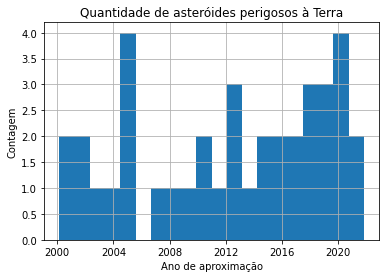

In [41]:
dangerous_obj_period = obj_period.loc[obj_period['is_potentially_hazardous_asteroid']==True]
dangerous_obj_period['close_approach_date'].hist(bins=20)

# Mudar legendas do histograma
plt.title('Quantidade de asteróides perigosos à Terra')
plt.xlabel('Ano de aproximação')
plt.ylabel('Contagem')
plt.show()

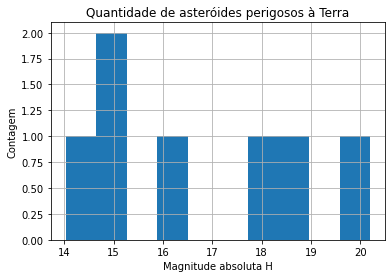

In [48]:
# Histograma dos tamanhos dos objetos perigosos
dangerous_obj['absolute_magnitude_h'].hist(bins=10)
plt.title('Quantidade de asteróides perigosos à Terra')
plt.xlabel('Magnitude absoluta H')
plt.ylabel('Contagem')
plt.show()

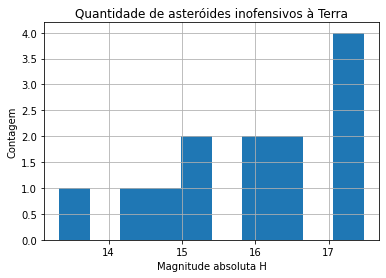

In [49]:
# Histograma dos tamanhos dos objetos inofensivos
simp_df.loc[-simp_df['id'].isin(dangerous_obj_id)]['absolute_magnitude_h'].hist(bins=10)
plt.title('Quantidade de asteróides inofensivos à Terra')
plt.xlabel('Magnitude absoluta H')
plt.ylabel('Contagem')
plt.show()